# Download flower 

In [31]:
import os

url = "http://download.tensorflow.org/example_images/flower_photos.tgz"
filename = url.split('/')[-1]

download_dir = 'datasets/flowers'
file_path = os.path.join(download_dir, filename)

In [32]:
import os
import urllib.request
import zipfile
import tarfile

if not os.path.exists(file_path):
    if not os.path.exists(download_dir):
        os.makedirs(download_dir)
    
    print("Downloading", filename, "...")
    file_path, _ = urllib.request.urlretrieve(url=url,
                                              filename=file_path,
                                              reporthook=download_progress)
    print("Done.")
    
    print("Extracting files.")
    if file_path.endswith(".zip"):
        zipfile.ZipFile(file=file_path, mode="r").extractall(download_dir)
    elif file_path.endswith((".tar.gz", ".tgz")):
        tarfile.open(name=file_path, mode="r:gz").extractall(download_dir)
    print("Done.")

In [33]:
if os.path.exists(file_path):
    print("Data has apparently already been downloaded and unpacked.")

Data has apparently already been downloaded and unpacked.


# Create flower_classes list

In [34]:
FLOWERS_PATH = os.path.join("datasets", "flowers")
flowers_root_path = os.path.join(FLOWERS_PATH, "flower_photos")

In [35]:
flower_classes = sorted([dirname for dirname in os.listdir(flowers_root_path)
                  if os.path.isdir(os.path.join(flowers_root_path, dirname))])

In [36]:
print(flower_classes)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


# Create image_paths dict 

In [51]:
from collections import defaultdict

image_paths = defaultdict(list)

for flower_class in flower_classes:
    image_dir = os.path.join(flowers_root_path, flower_class)
    for filepath in os.listdir(image_dir):
        if filepath.endswith(".jpg"):
            image_paths[flower_class].append(os.path.join(image_dir, filepath))

In [52]:
print(type(image_paths))

<class 'collections.defaultdict'>


In [53]:
print(type(image_paths['daisy']))

<class 'list'>


In [54]:
for cls in flower_classes:
    print(image_paths[cls][0:3])
    image_paths[cls].sort()
    print(image_paths[cls][0:3])

['datasets/flowers/flower_photos/daisy/14167534527_781ceb1b7a_n.jpg', 'datasets/flowers/flower_photos/daisy/5512287917_9f5d3f0f98_n.jpg', 'datasets/flowers/flower_photos/daisy/476857510_d2b30175de_n.jpg']
['datasets/flowers/flower_photos/daisy/100080576_f52e8ee070_n.jpg', 'datasets/flowers/flower_photos/daisy/10140303196_b88d3d6cec.jpg', 'datasets/flowers/flower_photos/daisy/10172379554_b296050f82_n.jpg']
['datasets/flowers/flower_photos/dandelion/9965757055_ff01b5ee6f_n.jpg', 'datasets/flowers/flower_photos/dandelion/461632542_0387557eff.jpg', 'datasets/flowers/flower_photos/dandelion/4572738670_4787a11058_n.jpg']
['datasets/flowers/flower_photos/dandelion/10043234166_e6dd915111_n.jpg', 'datasets/flowers/flower_photos/dandelion/10200780773_c6051a7d71_n.jpg', 'datasets/flowers/flower_photos/dandelion/10294487385_92a0676c7d_m.jpg']
['datasets/flowers/flower_photos/roses/16209331331_343c899d38.jpg', 'datasets/flowers/flower_photos/roses/5777669976_a205f61e5b.jpg', 'datasets/flowers/flowe

In [55]:
import matplotlib.image as mpimg
import numpy as np

n_examples_per_class = 2

for flower_class in flower_classes:
    for i in range(n_examples_per_class):
        img_path = image_paths[flower_class][i]
        example_image = mpimg.imread(img_path)
        msg = 'class: {:>10s}, max: {}, min: {}'
        print(msg.format(flower_class, np.max(example_image), np.min(example_image)))

class:      daisy, max: 238, min: 0
class:      daisy, max: 255, min: 0
class:  dandelion, max: 255, min: 0
class:  dandelion, max: 255, min: 0
class:      roses, max: 255, min: 0
class:      roses, max: 255, min: 0
class: sunflowers, max: 255, min: 0
class: sunflowers, max: 255, min: 0
class:     tulips, max: 255, min: 0
class:     tulips, max: 255, min: 0


Class: daisy


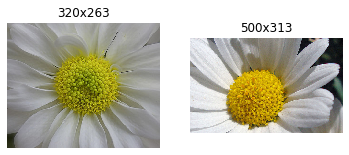

Class: dandelion


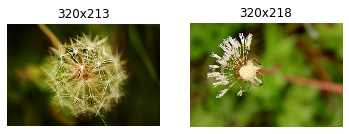

Class: roses


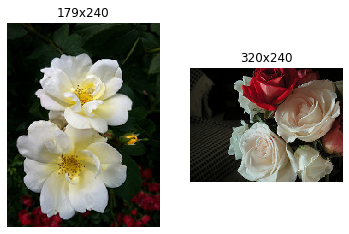

Class: sunflowers


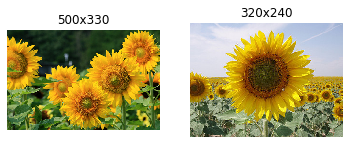

Class: tulips


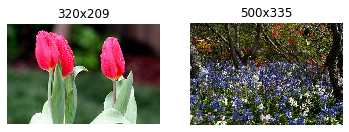

In [56]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

n_examples_per_class = 5

for flower_class in flower_classes:
    print("Class:", flower_class)
    fig, axes = plt.subplots(1, 2)
    for i, ax in enumerate(axes):
        img_path = image_paths[flower_class][i]
        example_image = mpimg.imread(img_path)
        ax.set_title("{}x{}".format(example_image.shape[1], example_image.shape[0]))
        ax.imshow(example_image)
        ax.axis("off")
    plt.show()